# Logistic Regression is Best 


In [232]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [233]:
titandf=pd.read_csv('titanic.csv')

titandf


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [234]:
titandf=titandf.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [235]:
titandf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [236]:
titandf.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [237]:
titandf['Age'].fillna(0,inplace=True)
titandf['Embarked']=titandf['Embarked'].dropna()

In [238]:
titandf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [239]:
titandf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,0.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [240]:
titdf=titandf.dropna()

In [241]:
titdf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [242]:
titdf['Sex'].unique()

array(['male', 'female'], dtype=object)

In [243]:
titdf['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [244]:
titdf['Sex']=titdf['Sex'].replace({'male':0,'female':1})
titdf['Embarked']=titdf['Embarked'].replace({'S':0,'C':1,'Q':2})

In [245]:
titdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,0.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [246]:
print(titdf.corr().to_string())

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Survived  1.000000 -0.335549  0.541585  0.006323 -0.034040  0.083151  0.255290  0.108669
Pclass   -0.335549  1.000000 -0.127741 -0.358174  0.081656  0.016824 -0.548193  0.043835
Sex       0.541585 -0.127741  1.000000 -0.029673  0.116348  0.247508  0.179958  0.118593
Age       0.006323 -0.358174 -0.029673  1.000000 -0.183675 -0.047354  0.132830 -0.208187
SibSp    -0.034040  0.081656  0.116348 -0.183675  1.000000  0.414542  0.160887 -0.060606
Parch     0.083151  0.016824  0.247508 -0.047354  0.414542  1.000000  0.217532 -0.079320
Fare      0.255290 -0.548193  0.179958  0.132830  0.160887  0.217532  1.000000  0.063462
Embarked  0.108669  0.043835  0.118593 -0.208187 -0.060606 -0.079320  0.063462  1.000000


<Axes: xlabel='Survived'>

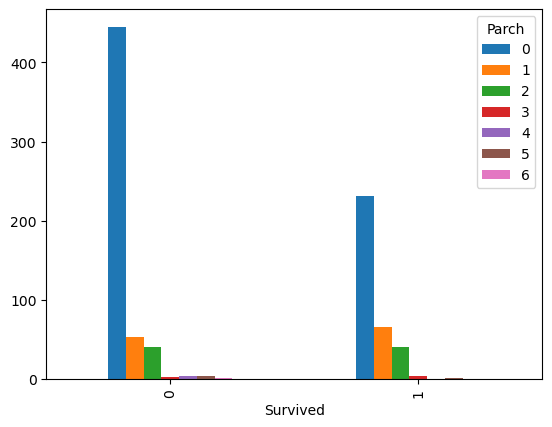

In [247]:
pd.crosstab(titdf['Survived'],titdf['Parch']).plot(kind='bar')

<Axes: xlabel='Survived'>

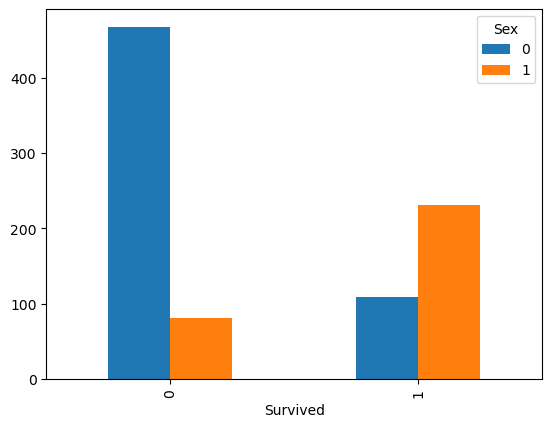

In [248]:
pd.crosstab(titdf['Survived'],titdf['Sex']).plot(kind='bar')

<Axes: xlabel='Survived'>

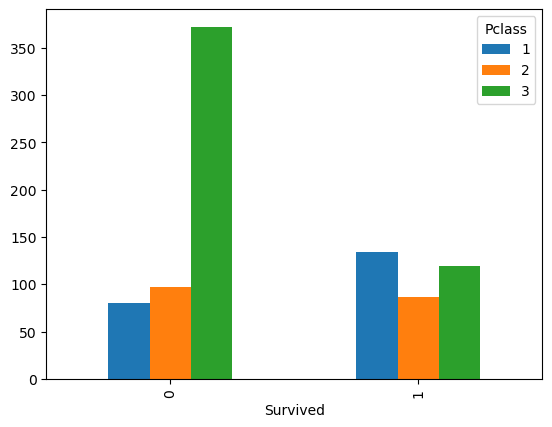

In [249]:
pd.crosstab(titdf['Survived'],titdf['Pclass']).plot(kind='bar')

<Axes: xlabel='Survived'>

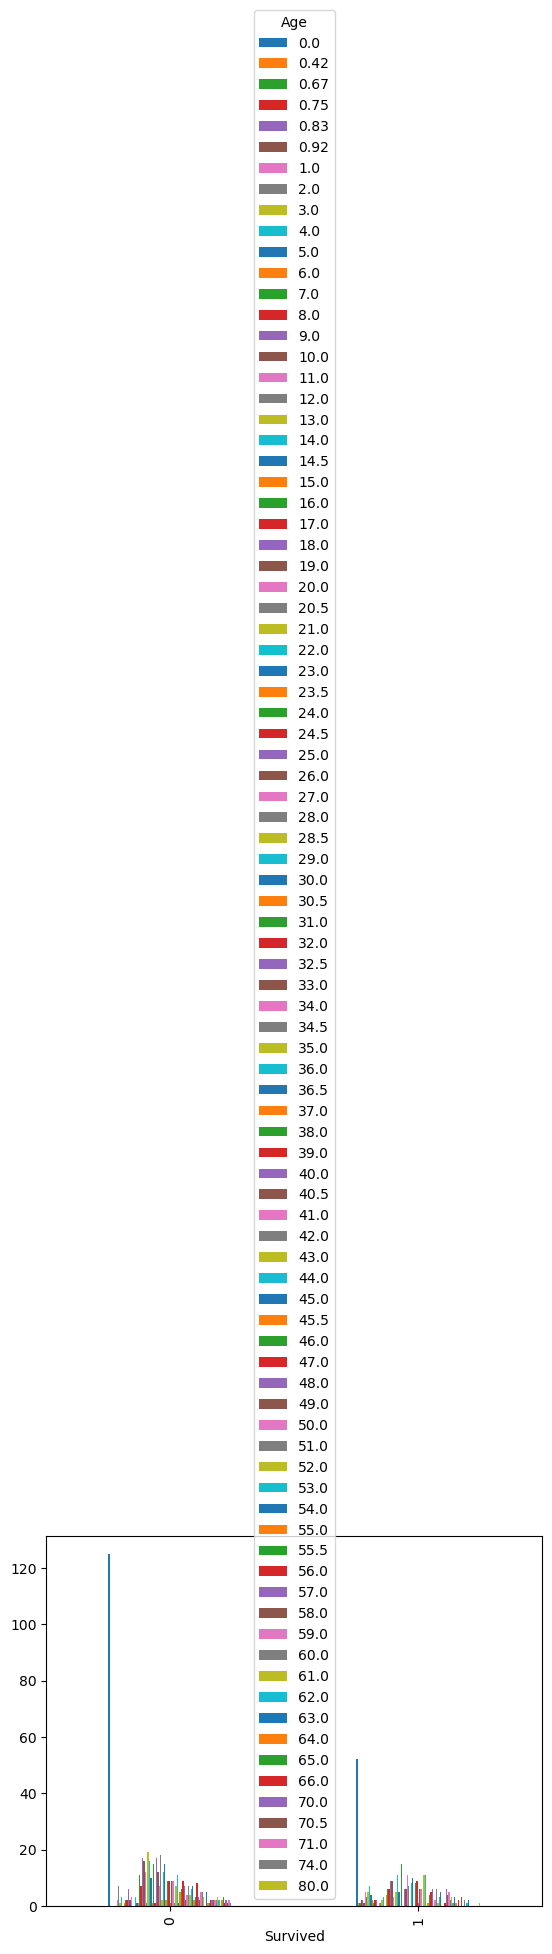

In [250]:
pd.crosstab(titdf['Survived'],titdf['Age']).plot(kind='bar')

In [251]:
x=titdf[['Pclass','Sex','Age','Parch','Embarked']]
y=titdf['Survived']

# Logistic Regression

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)
print(x_train.shape)
print(y_test.shape)

(800, 5)
(89,)


In [254]:
LogMod=LogisticRegression()
LogMod.fit(x_train,y_train)

LogisticRegression()

In [255]:
LogMod.predict(x_test)

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [256]:
LogMod.score(x_test,y_test)

0.8539325842696629

In [257]:
LogMod1=LogisticRegression()
LogMod1.fit(x,y)

LogisticRegression()

In [259]:
LogMod1.predict([[1,0,1,0,1]])

array([1], dtype=int64)

In [260]:
LogMod1.score(x,y)

0.7806524184476941

# DECISION TREE

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [268]:
x1=titdf[['Pclass','Sex','Age','Parch','Embarked']]
y1=titdf['Survived']

In [269]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.10)
print(x1_train.shape)
print(y1_test.shape)

(800, 5)
(89,)


In [270]:
DecMode=DecisionTreeClassifier()
DecMode.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [271]:
DecMode.predict(x1_test)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0], dtype=int64)

In [272]:
DecMode.score(x1_test,y1_test)

0.7415730337078652

# Linear Regression

In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
x1=titdf[['Pclass','Sex','Age','Parch','Embarked',]]
y1=titdf['Survived']

In [275]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20)
print(x1_train.shape)
print(y1_test.shape)

(711, 5)
(178,)


In [276]:
LinMode=LinearRegression()
LinMode.fit(x1_train,y1_train)

LinearRegression()

In [277]:
LinMode.predict(x_test)

array([0.95199953, 0.13389637, 0.92326347, 0.0675824 , 0.66908361,
       0.50605634, 0.21954492, 0.09975012, 0.90280457, 0.40437491,
       0.40658538, 0.2846089 , 0.58868142, 0.67512151, 0.44637376,
       0.17408562, 0.555949  , 0.0543196 , 0.08305566, 0.03442541,
       0.92669513, 0.48996327, 0.15722223, 0.4375319 , 0.6889778 ,
       0.07200333, 0.50605634, 0.08747659, 0.35485172, 0.50605634,
       0.59564106, 0.41358624, 0.41763771, 0.4441633 , 0.37342839,
       0.35653869, 0.26692518, 0.13389637, 0.18866592, 0.5709977 ,
       0.8485322 , 0.09410799, 0.13389637, 0.2791987 , 0.58868142,
       0.06537193, 0.04989867, 0.36095962, 0.26857094, 0.11644458,
       0.88832058, 0.40658538, 0.74823582, 0.96526232, 0.13389637,
       0.37243913, 0.83616236, 0.90459048, 0.06226852, 0.13389637,
       0.90148706, 0.44980543, 0.72655572, 0.04105681, 0.09763597,
       0.09189752, 0.060951  , 0.43311097, 0.09321504, 0.75044628,
       0.0675824 , 0.2417171 , 0.08437317, 0.20503214, 0.75265

In [278]:
LinMode.score(x1_test,y1_test)

0.4154088619015036